In [1]:
import pandas as pd
import logging

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Task 2: Data Preprocessing & Cleaning  



In [3]:
data=pd.read_csv('merged_data.csv')

In [4]:
data.head()

,date,temperature_2m,subba,subba-name,parent,parent-name,value,value-units
0,2022-01-01 05:00:00,11.0585,ZONA,West - NYIS,NYIS,New York Independent System Operator,1487,megawatthours
1,2022-01-01 05:00:00,11.0585,ZONB,Genesee - NYIS,NYIS,New York Independent System Operator,963,megawatthours
2,2022-01-01 05:00:00,11.0585,ZONC,Central - NYIS,NYIS,New York Independent System Operator,1575,megawatthours
3,2022-01-01 05:00:00,11.0585,ZOND,North - NYIS,NYIS,New York Independent System Operator,667,megawatthours
4,2022-01-01 05:00:00,11.0585,ZONE,Mohawk Valley - NYIS,NYIS,New York Independent System Operator,752,megawatthours


In [5]:
subba_mapping = data.groupby("subba")["subba-name"].unique()
print(subba_mapping)


subba
ZONA                      [West - NYIS, West]
ZONB                [Genesee - NYIS, Genesee]
ZONC                [Central - NYIS, Central]
ZOND                    [North - NYIS, North]
ZONE    [Mohawk Valley - NYIS, Mohawk Valley]
ZONF                [Capital - NYIS, Capital]
ZONG    [Hudson Valley - NYIS, Hudson Valley]
ZONH              [Millwood - NYIS, Millwood]
ZONI            [Dunwoodie - NYIS, Dunwoodie]
ZONJ    [New York City - NYIS, New York City]
ZONK        [Long Island - NYIS, Long Island]
Name: subba-name, dtype: object


In [6]:
data=data[['date','temperature_2m','subba-name','value']]

In [7]:
data.head()

,date,temperature_2m,subba-name,value
0,2022-01-01 05:00:00,11.0585,West - NYIS,1487
1,2022-01-01 05:00:00,11.0585,Genesee - NYIS,963
2,2022-01-01 05:00:00,11.0585,Central - NYIS,1575
3,2022-01-01 05:00:00,11.0585,North - NYIS,667
4,2022-01-01 05:00:00,11.0585,Mohawk Valley - NYIS,752


In [8]:
data.rename(columns={'date':'Timestamp','temperature_2m':'Temperature','subba-name':'Province','value':'Value'},inplace=True)

In [9]:
data.head()

,Timestamp,Temperature,Province,Value
0,2022-01-01 05:00:00,11.0585,West - NYIS,1487
1,2022-01-01 05:00:00,11.0585,Genesee - NYIS,963
2,2022-01-01 05:00:00,11.0585,Central - NYIS,1575
3,2022-01-01 05:00:00,11.0585,North - NYIS,667
4,2022-01-01 05:00:00,11.0585,Mohawk Valley - NYIS,752


### No missing values found. If >20% missing, drop; else, forward fill to maintain time-series continuity.  


In [10]:
def handle_missing_data(df):
    """Identify and handle missing data."""
    missing_summary = df.isnull().sum() / len(df) * 100
    logging.info("Missing Data Percentage per Column:\n" + str(missing_summary))
    
    # Decide on handling strategy
    df.dropna(thresh=len(df) * 0.8, axis=1, inplace=True)  # Drop columns with >20% missing
    df.fillna(method='ffill', inplace=True)  # Forward-fill remaining missing values
    
    return df

In [11]:
data=handle_missing_data(data)

2025-03-02 19:47:17,712 - INFO - Missing Data Percentage per Column:
Timestamp      0.0
Temperature    0.0
Province       0.0
Value          0.0
dtype: float64
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10164\3531840652.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill remaining missing values


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435764 entries, 0 to 1435763
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Timestamp    1435764 non-null  object 
 1   Temperature  1435764 non-null  float64
 2   Province     1435764 non-null  object 
 3   Value        1435764 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 43.8+ MB


In [13]:
data['Value'] = data['Value'].astype(float)

In [14]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

### Extract Some Features from Timestamp Coloumn

In [15]:
def feature_engineering(df):
    """
    Add new time-based features from the 'date' column.
    """
    if 'Timestamp' in df.columns:
        df['hour'] = df['Timestamp'].dt.hour
        df['day_of_week'] = df['Timestamp'].dt.day_name()
        df['month'] = df['Timestamp'].dt.month
        df['year'] = df['Timestamp'].dt.year
        df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
        logging.info("Feature engineering applied: Added hour, day_of_week, month, year, and is_weekend.")
    return df

In [16]:
data=feature_engineering(data)

2025-03-02 19:47:19,166 - INFO - Feature engineering applied: Added hour, day_of_week, month, year, and is_weekend.


In [17]:
data.head()

,Timestamp,Temperature,Province,Value,hour,day_of_week,month,year,is_weekend
0,2022-01-01 05:00:00,11.0585,West - NYIS,1487.0,5,Saturday,1,2022,1
1,2022-01-01 05:00:00,11.0585,Genesee - NYIS,963.0,5,Saturday,1,2022,1
2,2022-01-01 05:00:00,11.0585,Central - NYIS,1575.0,5,Saturday,1,2022,1
3,2022-01-01 05:00:00,11.0585,North - NYIS,667.0,5,Saturday,1,2022,1
4,2022-01-01 05:00:00,11.0585,Mohawk Valley - NYIS,752.0,5,Saturday,1,2022,1


In [18]:
data=data[['Timestamp','hour','month','is_weekend','Province','Value','Temperature']]

In [19]:
data.head()

,Timestamp,hour,month,is_weekend,Province,Value,Temperature
0,2022-01-01 05:00:00,5,1,1,West - NYIS,1487.0,11.0585
1,2022-01-01 05:00:00,5,1,1,Genesee - NYIS,963.0,11.0585
2,2022-01-01 05:00:00,5,1,1,Central - NYIS,1575.0,11.0585
3,2022-01-01 05:00:00,5,1,1,North - NYIS,667.0,11.0585
4,2022-01-01 05:00:00,5,1,1,Mohawk Valley - NYIS,752.0,11.0585


In [20]:
data.shape

(1435764, 7)

### Duplicate Rows Removed

In [21]:
#duplicates removed
data.drop_duplicates(inplace=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289531 entries, 0 to 301586
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Timestamp    289531 non-null  datetime64[ns]
 1   hour         289531 non-null  int32         
 2   month        289531 non-null  int32         
 3   is_weekend   289531 non-null  int64         
 4   Province     289531 non-null  object        
 5   Value        289531 non-null  float64       
 6   Temperature  289531 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 15.5+ MB


In [23]:
data.shape

(289531, 7)

### Check Demand in each City

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10164\1119231963.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=province_demand.index, x=province_demand.values, palette="coolwarm", orient='h')


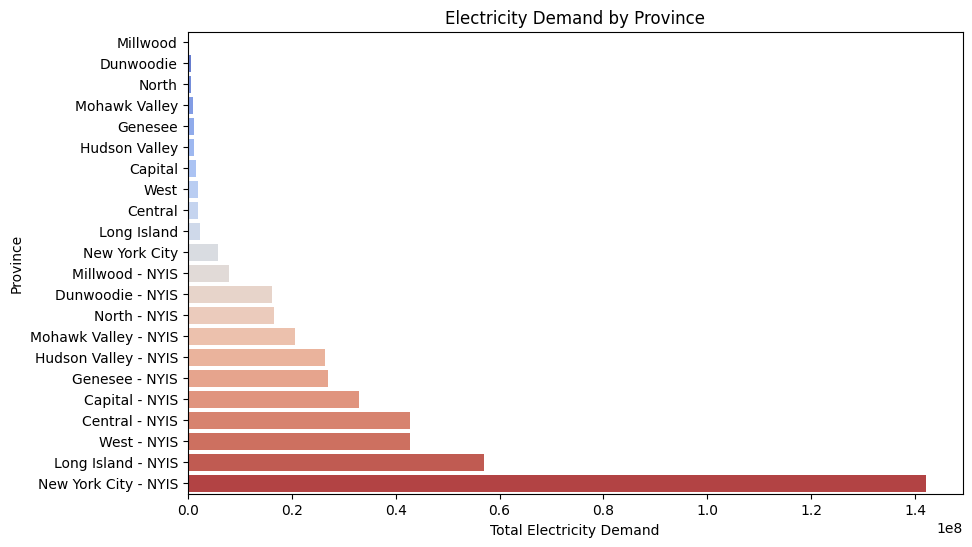

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by Province and sum the electricity demand
province_demand = data.groupby("Province")["Value"].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=province_demand.index, x=province_demand.values, palette="coolwarm", orient='h')

plt.ylabel("Province")
plt.xlabel("Total Electricity Demand")
plt.title("Electricity Demand by Province")
plt.show()

### Apply One Hot Encoding Technique on Province Feature

In [25]:
data = pd.get_dummies(data, columns=['Province'], drop_first=True)
# Convert only the new dummy columns to int
dummy_cols = [col for col in data.columns if 'Province_' in col]
data[dummy_cols] = data[dummy_cols].astype(int)


In [26]:
data.head()

,Timestamp,hour,month,is_weekend,Value,Temperature,Province_Capital - NYIS,Province_Central,Province_Central - NYIS,Province_Dunwoodie,...,Province_Millwood,Province_Millwood - NYIS,Province_Mohawk Valley,Province_Mohawk Valley - NYIS,Province_New York City,Province_New York City - NYIS,Province_North,Province_North - NYIS,Province_West,Province_West - NYIS
0,2022-01-01 05:00:00,5,1,1,1487.0,11.0585,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-01 05:00:00,5,1,1,963.0,11.0585,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-01 05:00:00,5,1,1,1575.0,11.0585,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-01 05:00:00,5,1,1,667.0,11.0585,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2022-01-01 05:00:00,5,1,1,752.0,11.0585,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289531 entries, 0 to 301586
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      289531 non-null  datetime64[ns]
 1   hour                           289531 non-null  int32         
 2   month                          289531 non-null  int32         
 3   is_weekend                     289531 non-null  int64         
 4   Value                          289531 non-null  float64       
 5   Temperature                    289531 non-null  float64       
 6   Province_Capital - NYIS        289531 non-null  int64         
 7   Province_Central               289531 non-null  int64         
 8   Province_Central - NYIS        289531 non-null  int64         
 9   Province_Dunwoodie             289531 non-null  int64         
 10  Province_Dunwoodie - NYIS      289531 non-null  int64         
 11  Provi

# Task 3: Explatory Data Analysis

In [28]:
#Task3 Started
# Drop the 'Timestamp' column to keep only numerical data
numerical_columns = data.drop('Timestamp', axis=1)

# Compute statistical summary
summary_stats = numerical_columns.describe().T  # Transpose for better readability
summary_stats['skewness'] = numerical_columns.skew()
summary_stats['kurtosis'] = numerical_columns.kurtosis()

In [29]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
hour,289531.0,11.502223,6.921747,0.0000,6.0000,12.0000,18.0000,23.0000,-0.000464,-1.203871
month,289531.0,6.517648,3.450933,1.0000,4.0000,7.0000,10.0000,12.0000,-0.008226,-1.208967
is_weekend,289531.0,0.286121,0.451948,0.0000,0.0000,0.0000,1.0000,1.0000,0.946482,-1.104179
Value,289531.0,1556.937606,1455.568629,168.0000,696.0000,1120.0000,1725.0000,10830.0000,2.404389,5.927580
Temperature,289531.0,11.346059,8.095719,-10.4915,5.0085,10.8085,17.4085,37.7085,0.179755,-0.607154
Province_Capital - NYIS,289531.0,0.087196,0.282123,0.0000,0.0000,0.0000,0.0000,1.0000,2.926432,6.564051
Province_Central,289531.0,0.003713,0.060820,0.0000,0.0000,0.0000,0.0000,1.0000,16.319854,264.339475
Province_Central - NYIS,289531.0,0.087196,0.282123,0.0000,0.0000,0.0000,0.0000,1.0000,2.926432,6.564051
Province_Dunwoodie,289531.0,0.003713,0.060820,0.0000,0.0000,0.0000,0.0000,1.0000,16.319854,264.339475
Province_Dunwoodie - NYIS,289531.0,0.087196,0.282123,0.0000,0.0000,0.0000,0.0000,1.0000,2.926432,6.564051


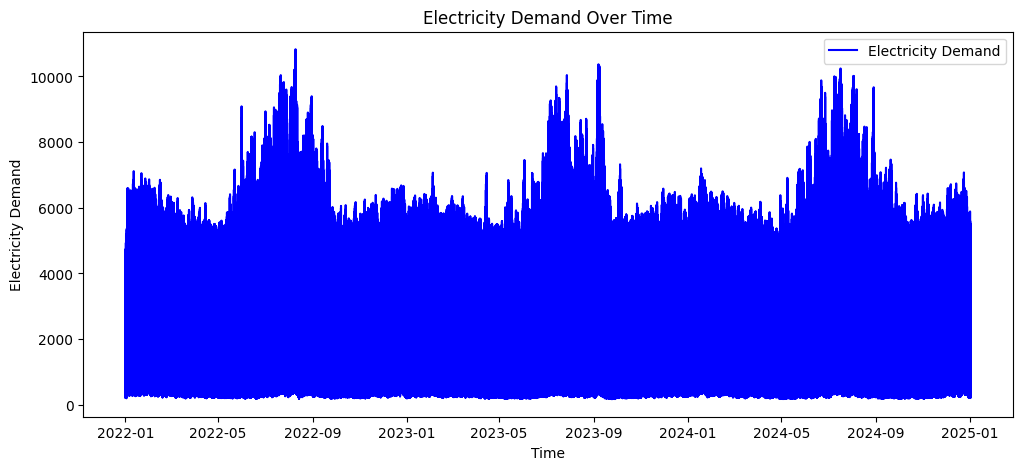

In [30]:


# Convert Timestamp column to datetime if not already
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plot electricity demand over time
plt.figure(figsize=(12,5))
plt.plot(data['Timestamp'], data['Value'], label='Electricity Demand', color='b')
plt.xlabel('Time')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand Over Time')
plt.legend()
plt.show()


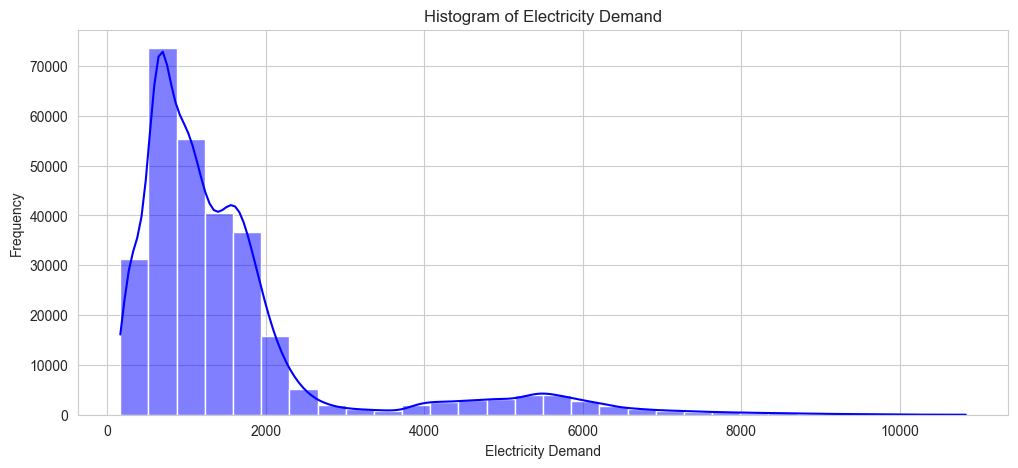

In [31]:

# Set style for better visuals
sns.set_style("whitegrid")

# Histogram for Electricity Demand
plt.figure(figsize=(12,5))
sns.histplot(data['Value'], bins=30, kde=True, color='blue')
plt.title("Histogram of Electricity Demand")
plt.xlabel("Electricity Demand")
plt.ylabel("Frequency")
plt.show()

2025-03-02 19:47:25,291 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10164\1488879990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_demand.index, y=monthly_demand.values, palette="viridis" )
2025-03-02 19:47:25,297 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


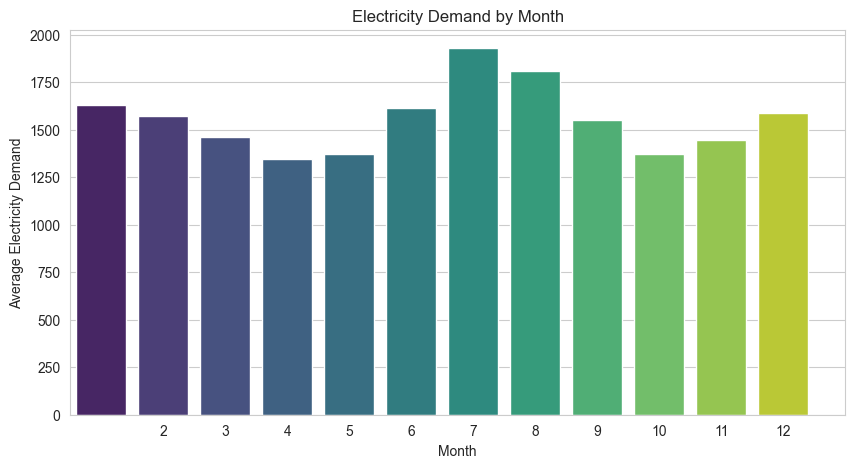

In [32]:
# Group by month and calculate the average electricity demand
monthly_demand = data.groupby("month")["Value"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values, palette="viridis" )

plt.xlabel("Month")
plt.ylabel("Average Electricity Demand")
plt.title("Electricity Demand by Month")
plt.xticks(range(1, 13))  # Ensure months are labeled correctly (1-12)
plt.show()

2025-03-02 19:47:25,494 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10164\3592915936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_demand.index, y=weekend_demand.values, palette="coolwarm")
2025-03-02 19:47:25,501 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


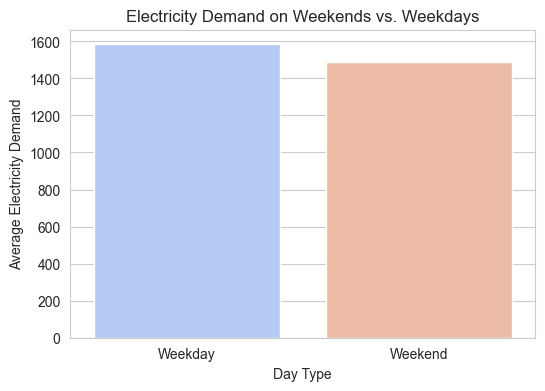

In [33]:
# Group by 'is_weekend' (0 = Weekday, 1 = Weekend) and calculate the average demand
weekend_demand = data.groupby("is_weekend")["Value"].mean()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_demand.index, y=weekend_demand.values, palette="coolwarm")

# Labels
plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"])  # Convert 0/1 to labels
plt.ylabel("Average Electricity Demand")
plt.xlabel("Day Type")
plt.title("Electricity Demand on Weekends vs. Weekdays")

plt.show()

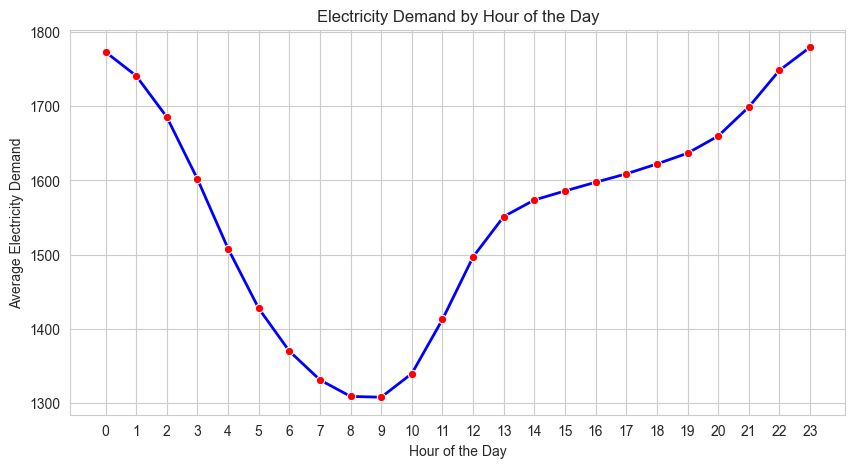

In [34]:
# Group by hour and calculate the average demand
hourly_demand = data.groupby("hour")["Value"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values, marker="o", linewidth=2, color="blue",markerfacecolor='red')

# Labels
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.xlabel("Hour of the Day")
plt.ylabel("Average Electricity Demand")
plt.title("Electricity Demand by Hour of the Day")

plt.grid(True)
plt.show()

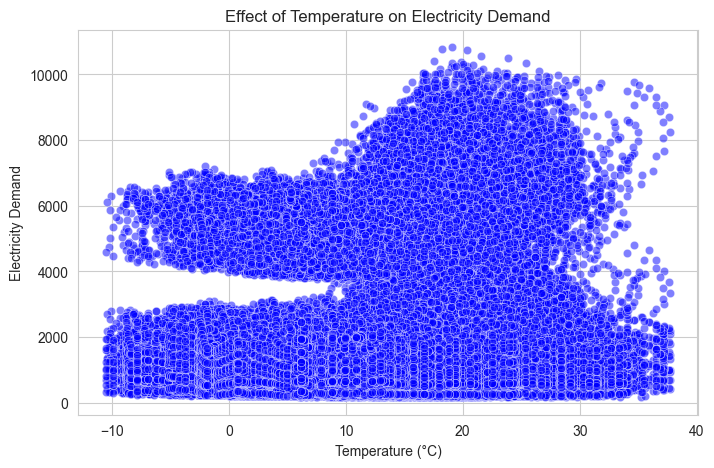

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Temperature"], y=data["Value"], alpha=0.5, color="b")

plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Demand")
plt.title("Effect of Temperature on Electricity Demand")

plt.grid(True)
plt.show()

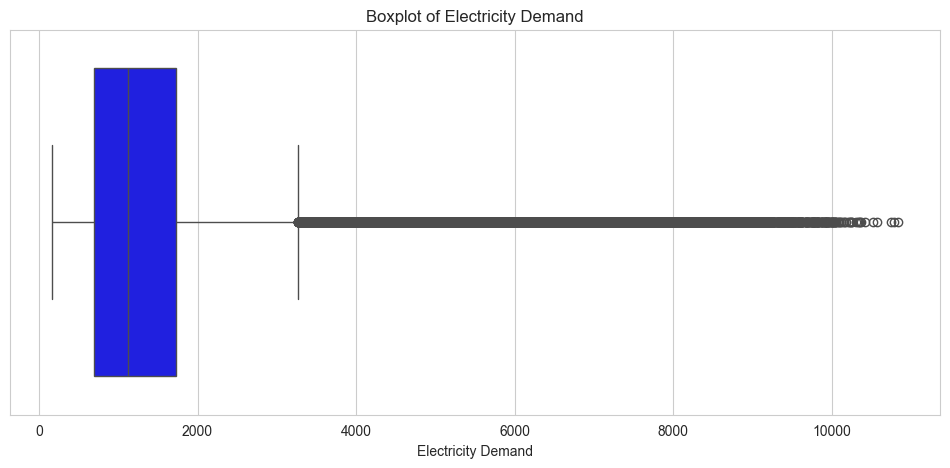

In [36]:
# Boxplot for Electricity Demand
plt.figure(figsize=(12,5))
sns.boxplot(x=data['Value'], color='blue')
plt.title("Boxplot of Electricity Demand")
plt.xlabel("Electricity Demand")
plt.show()

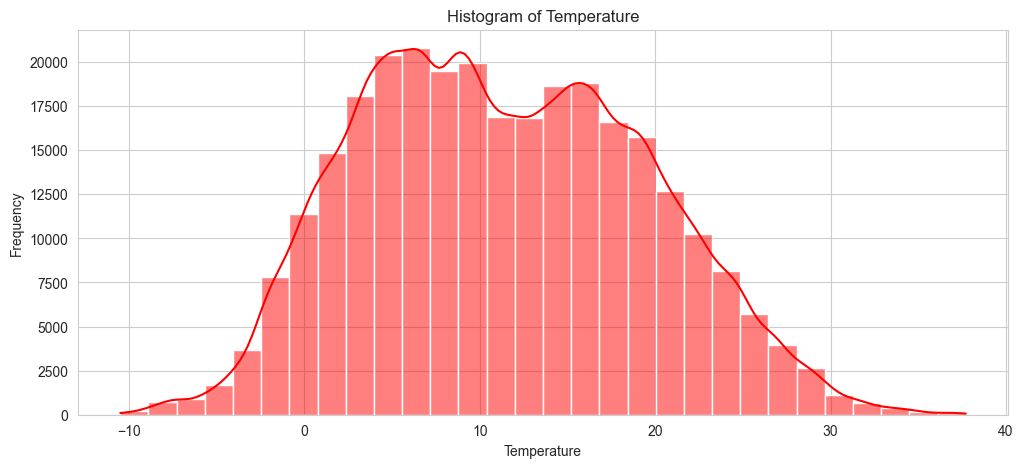

In [37]:
# Histogram for Temperature
plt.figure(figsize=(12,5))
sns.histplot(data['Temperature'], bins=30, kde=True, color='red')
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

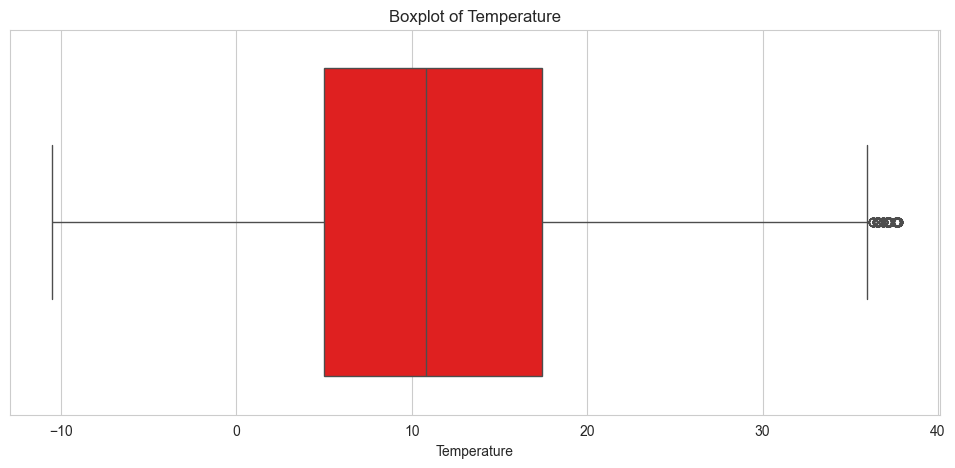

In [38]:
# Boxplot for Temperature
plt.figure(figsize=(12,5))
sns.boxplot(x=data['Temperature'], color='red')
plt.title("Boxplot of Temperature")
plt.xlabel("Temperature")
plt.show()

In [39]:
# correlation_data=data[['Timestamp','hour','month','is_weekend','Value','Temperature']]

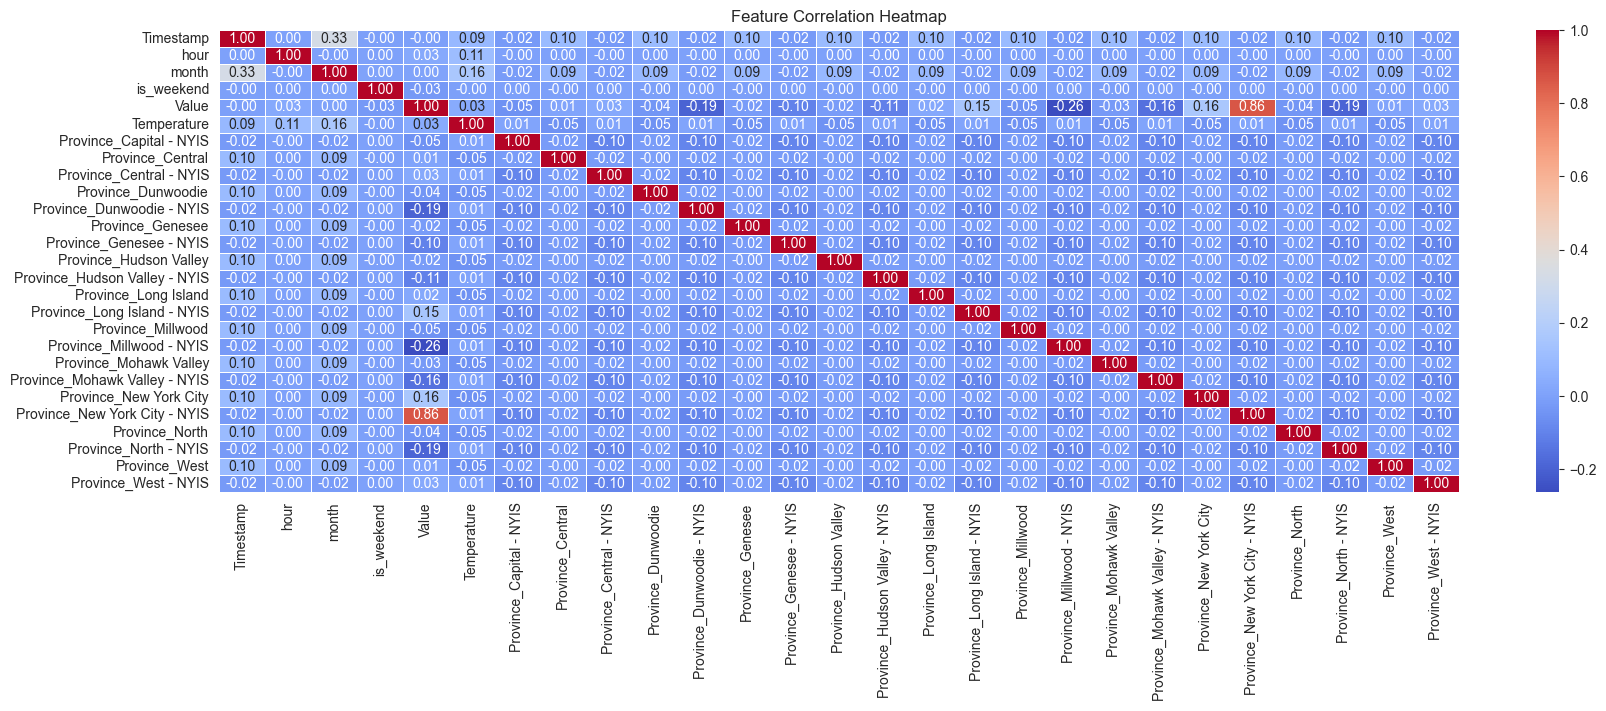

In [40]:
import numpy as np

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

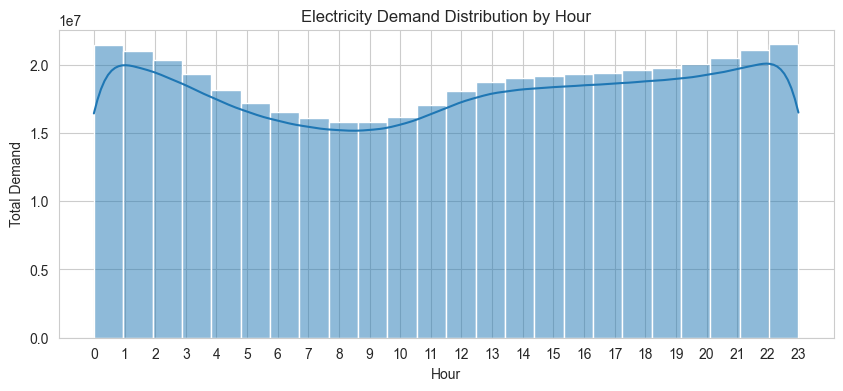

In [41]:
plt.figure(figsize=(10, 4))
sns.histplot(data, x="hour", weights="Value", bins=24, kde=True)
plt.title("Electricity Demand Distribution by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Demand")
plt.xticks(range(0, 24))
plt.show()


In [42]:
# data['Province'].unique()

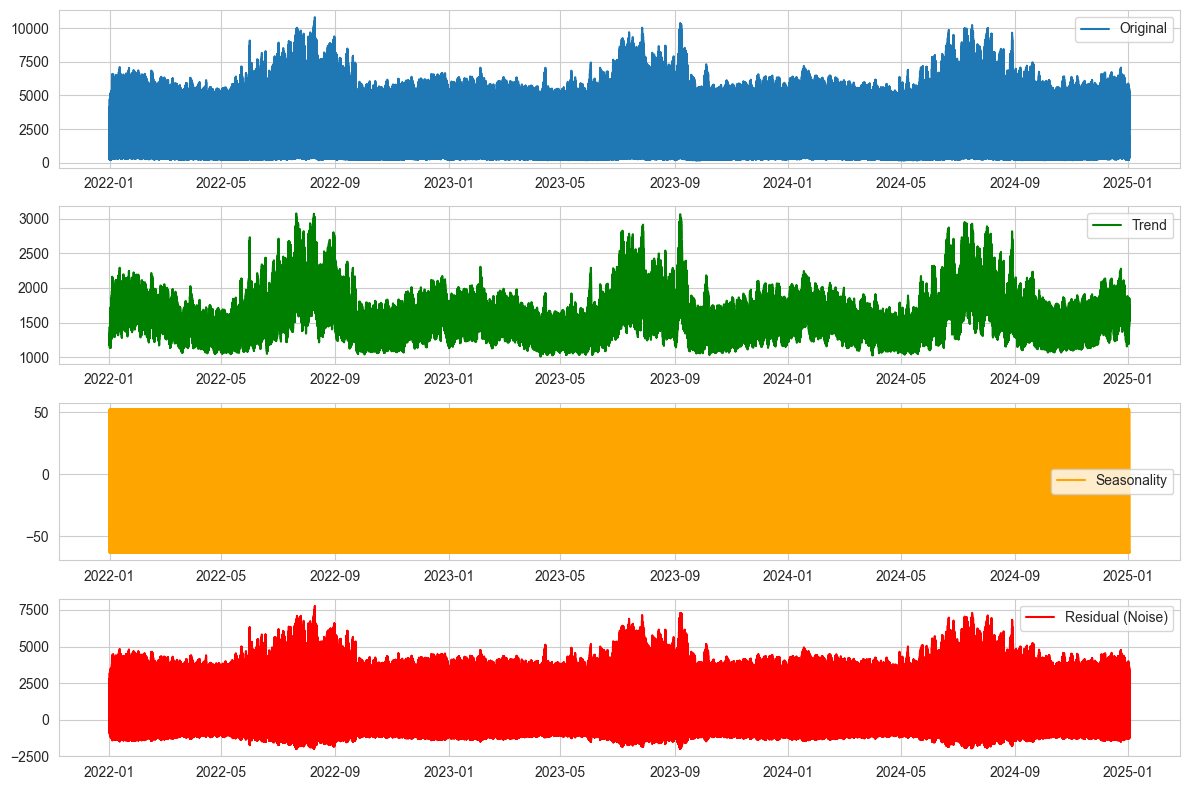

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Timestamp is the index
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

# Perform decomposition
decomposition = seasonal_decompose(data['Value'], model='additive', period=24)  # Adjust period based on data frequency

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Value'], label="Original")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color='green')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color='orange')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual (Noise)", color='red')
plt.legend()

plt.tight_layout()
plt.show()

# Task4 Outlier Detection and Handling

In [44]:
#Task4 Start
# ----- Outlier Detection Using IQR -----
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [45]:
# ----- Outlier Detection Using Z-score -----
def detect_outliers_zscore(df, column, threshold=3):
    df["zscore"] = np.abs(zscore(df[column]))
    outliers = df[df["zscore"] > threshold]
    df.drop(columns=["zscore"], inplace=True)  # Cleanup
    return outliers


📊 Outliers in 'Temperature' (IQR Method): 121
📊 Outliers in 'Temperature' (Z-score Method): 132


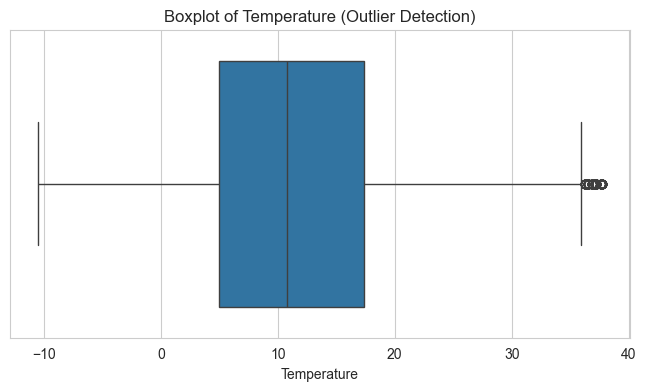


📊 Outliers in 'Value' (IQR Method): 28496
📊 Outliers in 'Value' (Z-score Method): 8287


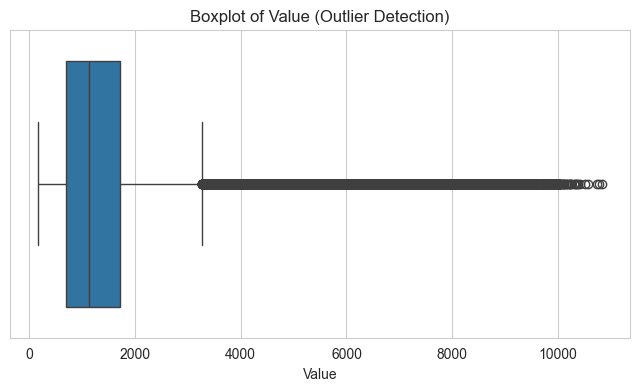

In [46]:
from scipy.stats import zscore
numerical_columns=numerical_columns[['Temperature','Value']]
for col in numerical_columns:
    outliers_iqr = detect_outliers_iqr(data, col)
    outliers_z = detect_outliers_zscore(data, col)
    
    print(f"\n📊 Outliers in '{col}' (IQR Method): {len(outliers_iqr)}")
    print(f"📊 Outliers in '{col}' (Z-score Method): {len(outliers_z)}")
    
    # Visualization - Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

In [47]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower, upper)
    return df

data_capped = cap_outliers(data, "Value")
data_capped = cap_outliers(data_capped, "Temperature")

print(f"Data size after capping outliers: {data_capped.shape}")


Data size after capping outliers: (289531, 26)



📊 Outliers in 'Temperature' (IQR Method): 0
📊 Outliers in 'Temperature' (Z-score Method): 0


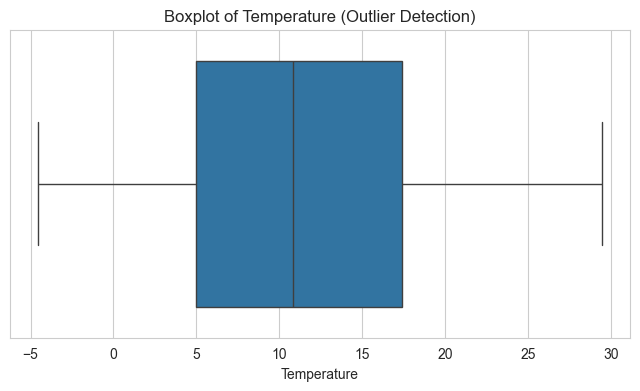


📊 Outliers in 'Value' (IQR Method): 28496
📊 Outliers in 'Value' (Z-score Method): 9584


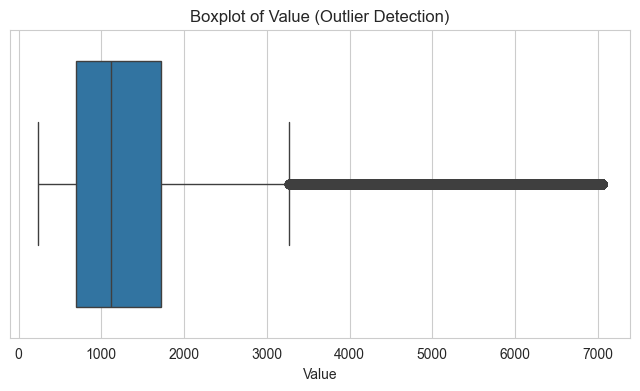

In [48]:
for col in numerical_columns:
    outliers_iqr = detect_outliers_iqr(data, col)
    outliers_z = detect_outliers_zscore(data, col)
    
    print(f"\n📊 Outliers in '{col}' (IQR Method): {len(outliers_iqr)}")
    print(f"📊 Outliers in '{col}' (Z-score Method): {len(outliers_z)}")
    
    # Visualization - Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()


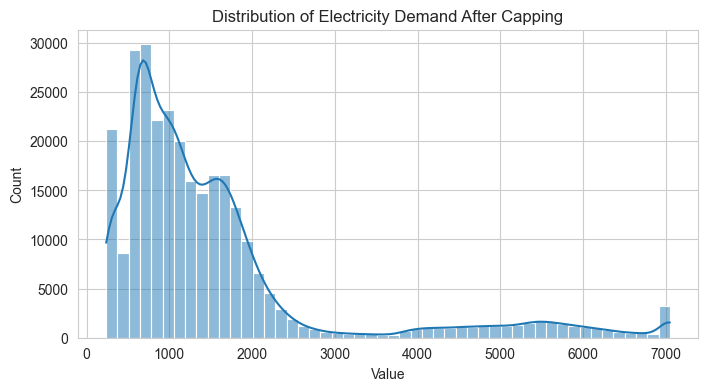

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Value"], bins=50, kde=True)
plt.title("Distribution of Electricity Demand After Capping")
plt.show()


### Apply Log for Handling Outliers

In [50]:
data["Value"] = np.log1p(data["Value"])  # log(1 + x) to avoid log(0) issues


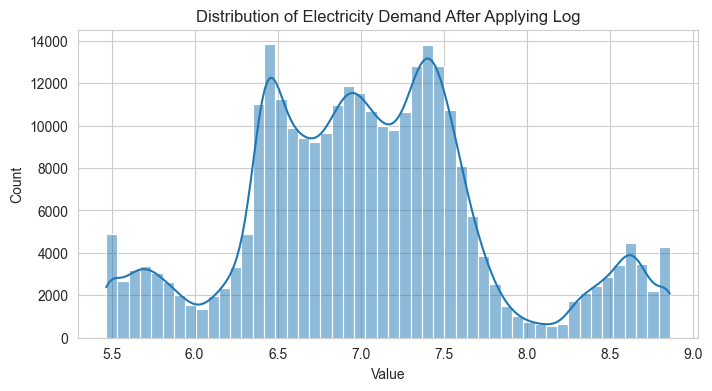

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Value"], bins=50, kde=True)
plt.title("Distribution of Electricity Demand After Applying Log")
plt.show()



📊 Outliers in 'Temperature' (IQR Method): 0
📊 Outliers in 'Temperature' (Z-score Method): 0


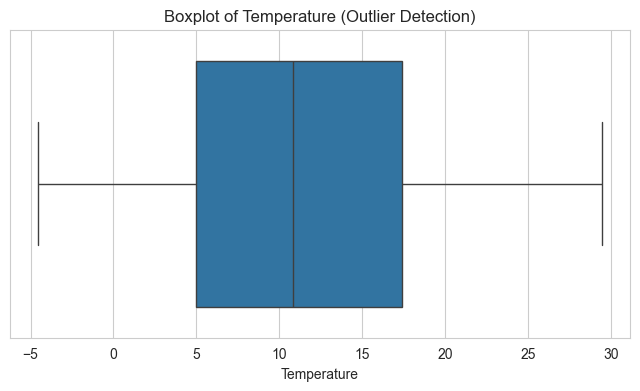


📊 Outliers in 'Value' (IQR Method): 3780
📊 Outliers in 'Value' (Z-score Method): 0


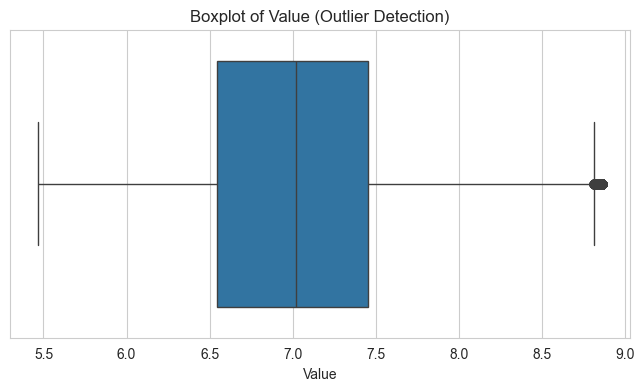

In [52]:
for col in numerical_columns:
    outliers_iqr = detect_outliers_iqr(data, col)
    outliers_z = detect_outliers_zscore(data, col)
    
    print(f"\n📊 Outliers in '{col}' (IQR Method): {len(outliers_iqr)}")
    print(f"📊 Outliers in '{col}' (Z-score Method): {len(outliers_z)}")
    
    # Visualization - Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

In [53]:
data.shape

(289531, 26)

In [54]:
data.head()

,hour,month,is_weekend,Value,Temperature,Province_Capital - NYIS,Province_Central,Province_Central - NYIS,Province_Dunwoodie,Province_Dunwoodie - NYIS,...,Province_Millwood,Province_Millwood - NYIS,Province_Mohawk Valley,Province_Mohawk Valley - NYIS,Province_New York City,Province_New York City - NYIS,Province_North,Province_North - NYIS,Province_West,Province_West - NYIS
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 05:00:00,5,1,1,7.305188,11.0585,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-01 05:00:00,5,1,1,6.871091,11.0585,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-01 05:00:00,5,1,1,7.362645,11.0585,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-01 05:00:00,5,1,1,6.504288,11.0585,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2022-01-01 05:00:00,5,1,1,6.624065,11.0585,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
# Identify outliers in 'Value' using IQR method
Q1 = data["Value"].quantile(0.25)
Q3 = data["Value"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned = data[(data["Value"] >= lower_bound) & (data["Value"] <= upper_bound)]

# Print new data size
print(f"New dataset size after removing outliers: {len(data_cleaned)}")


New dataset size after removing outliers: 285751


# Task5 Regression Modeling

In [56]:
#Task5 Started
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Step 1: Prepare Data
X = data.drop(['Value'], axis=1)  # Features
y = data['Value']  # Target variable

In [58]:
# Step 2: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Step 4: Predictions
y_pred = model.predict(X_test)

In [61]:
# Step 5: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.03260640475539973
R² Score: 0.939837382403242


### Model Performance  
- **Mean Squared Error (MSE):** 0.0326 → Low error, indicating accurate predictions.  
- **R² Score:** 0.9398 → Model explains ~94% of variance, showing strong performance.  


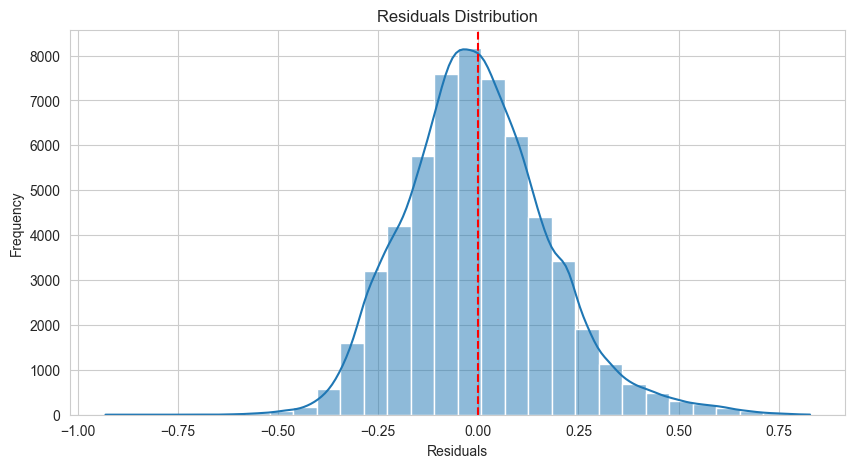

In [62]:
residuals = y_test.values - y_pred  # Calculate residuals

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.axvline(0, color="red", linestyle="dashed")  # Add a reference line at zero
plt.show()

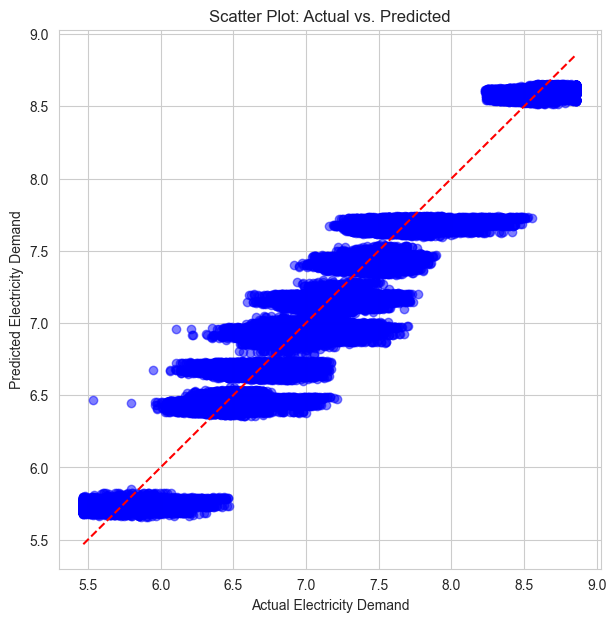

In [63]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red")  # Perfect prediction line

plt.xlabel("Actual Electricity Demand")
plt.ylabel("Predicted Electricity Demand")
plt.title("Scatter Plot: Actual vs. Predicted")
plt.show()